In [4]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'ai_ml_jobs_linkedin.csv'
# ai_linkedIn_data = pd.read_csv(file_path, encoding='latin1')
ai_linkedIn_data = pd.read_csv('ai_ml_jobs_linkedin.csv')
# print(ai_linkedIn_data.head())
print("num_unique_tile ", len(ai_linkedIn_data['title'].unique()))
print("num_unique_company ", len(ai_linkedIn_data['companyName'].unique()))
print("num_unique_location ", len(ai_linkedIn_data['location'].unique()))  

print("contractType ", len(ai_linkedIn_data['contractType'].unique()))
print("experienceLevel ", len(ai_linkedIn_data['experienceLevel'].unique()))
print("workType ", len(ai_linkedIn_data['workType'].unique())) 
print("sector ", len(ai_linkedIn_data['sector'].unique()))



num_unique_tile  442
num_unique_company  520
num_unique_location  164
contractType  5
experienceLevel  7
workType  55
sector  157


In [ ]:
ai_linkedIn_data

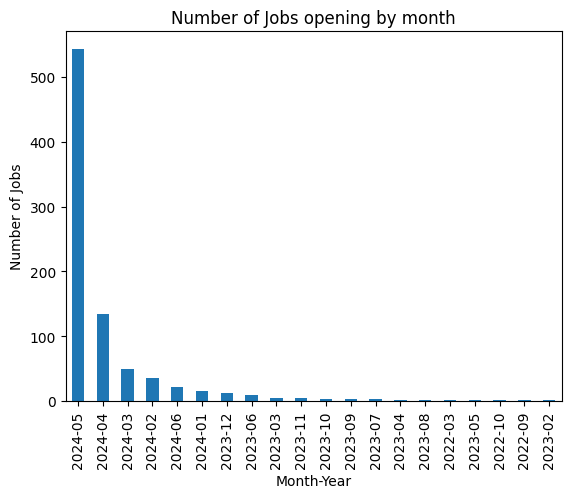

In [32]:
import matplotlib.pyplot as plt
ai_linkedIn_data['publishedAt'] = pd.to_datetime(ai_linkedIn_data['publishedAt'], errors='coerce')
ai_linkedIn_data['month_year'] = ai_linkedIn_data['publishedAt'].dt.to_period('M')
ai_linkedIn_data.head(4)
#plot nuber of jobs per month
ai_linkedIn_data['month_year'].value_counts().plot(kind='bar')
plt.xlabel('Month-Year')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs opening by month')
plt.show()



In [39]:
entry_level_data = ai_linkedIn_data[ai_linkedIn_data['experienceLevel'] == 'Entry level']


In [3]:
import pandas as pd
# ai_linkedIn_data['title']
# experience_level_dict = defaultdict(int)
# for job_title in ai_linkedIn_data['title'].str.lower():
#     experience_level_dict[job_title] += 1
# print(experience_level_dict)
len(ai_linkedIn_data['title'].unique())

442

In [44]:
ai_linkedIn_data['applicationsCount'].unique()

array(['Over 200 applicants', '51 applicants',
       'Be among the first 25 applicants', '110 applicants',
       '67 applicants', '26 applicants', '145 applicants',
       '85 applicants', '185 applicants', '49 applicants',
       '82 applicants', '113 applicants', '30 applicants',
       '98 applicants', '94 applicants', '107 applicants',
       '79 applicants', '139 applicants', '134 applicants',
       '43 applicants', '78 applicants', '37 applicants', '90 applicants',
       '54 applicants', '77 applicants', '63 applicants',
       '179 applicants', '198 applicants', '122 applicants',
       '137 applicants', '109 applicants', '96 applicants',
       '56 applicants', '33 applicants', '193 applicants',
       '157 applicants', '81 applicants', '40 applicants',
       '150 applicants', '62 applicants', '190 applicants',
       '170 applicants', '169 applicants', '163 applicants',
       '140 applicants', '57 applicants', '154 applicants',
       '66 applicants', '128 applicants', '

In [51]:
ai_linkedIn_data['applicationsCount']

0      200
1       51
2       25
3      200
4      110
      ... 
857    200
858     25
859    200
860     25
861     25
Name: applicationsCount, Length: 862, dtype: int64

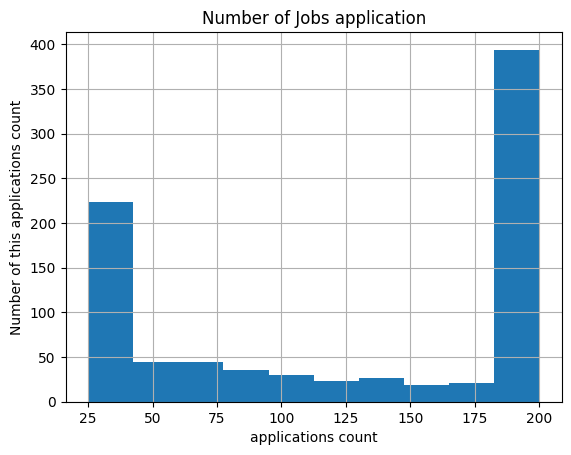

In [60]:
ai_linkedIn_data = pd.read_csv('ai_ml_jobs_linkedin.csv')
ai_linkedIn_data['applicationsCount_int'] = ai_linkedIn_data['applicationsCount'].str.extract('(\d+)')

ai_linkedIn_data['applicationsCount_int'] = ai_linkedIn_data['applicationsCount_int'].astype(int)
ai_linkedIn_data['applicationsCount_int'].hist()
plt.xlabel('applications count')
plt.ylabel('Number of this applications count')
plt.title('Number of Jobs application')
plt.show()





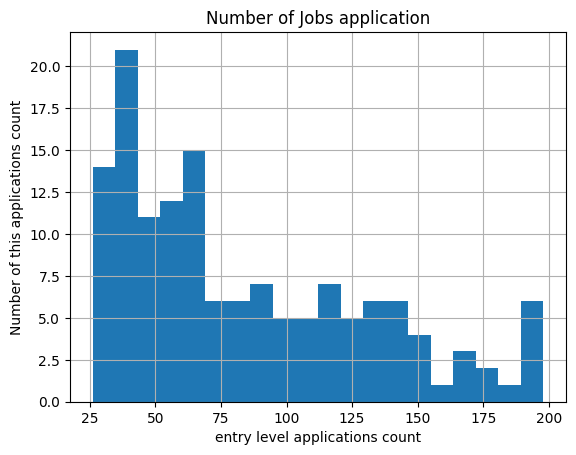

In [61]:
entry_level_data = ai_linkedIn_data[ai_linkedIn_data['experienceLevel'] == 'Entry level']
#hist that exclude 25 and 200
filtered_data = entry_level_data[(entry_level_data['applicationsCount_int'] != 25) & (entry_level_data['applicationsCount_int'] != 200)]
filtered_data['applicationsCount_int'].hist(bins=20)
#make the first x 20 a separate bin and evenly spread it out from 0 to 20


plt.xlabel('entry level applications count')
plt.ylabel('Number of this applications count')
plt.title('Number of Jobs application')
plt.show()

In [15]:
entry_level_data

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector,...,company_name_one_hot,contract_one_hot_encoded,ex_levl_one_hot_encoded,work_type_one_hot_encoded,sector_one_hot_encoded,timestamp,title_one_hot_encoded,latitude,longitude,salary


In [4]:
len(ai_linkedIn_data)

862

/var/folders/f0/pcrclrgj16d8fvj6q0tfp9wh0000gn/T/ipykernel_27989/3986914126.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entry_level_data['month_year'] = entry_level_data['publishedAt'].dt.to_period('M')


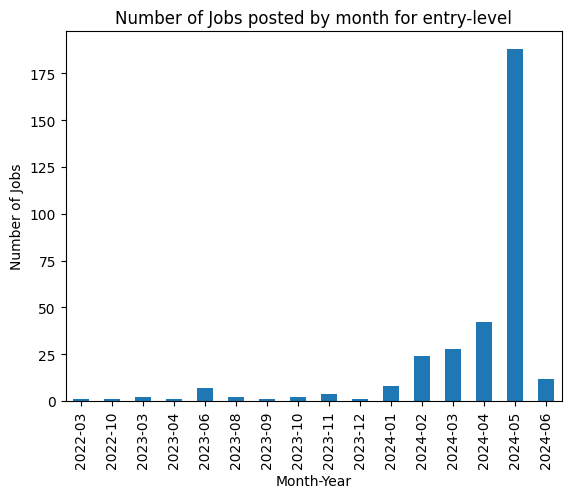

Text(0.5, 1.0, 'Average applications count by month')

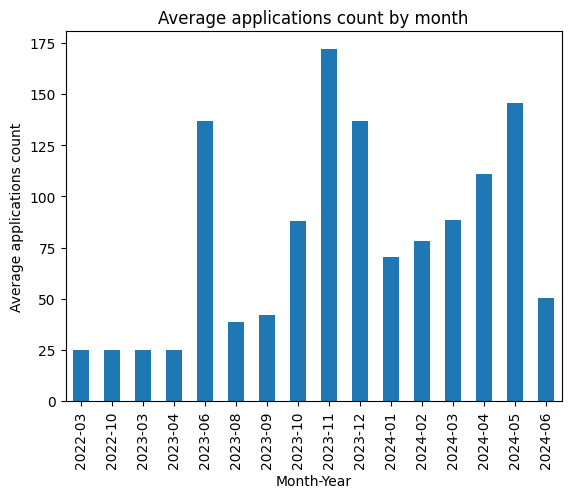

In [118]:
#for entry_level_data find the average applications count in respect to entry_level_data['month_year']
ai_linkedIn_data = pd.read_csv('ai_ml_jobs_linkedin.csv')
ai_linkedIn_data['applicationsCount_int'] = ai_linkedIn_data['applicationsCount'].str.extract('(\d+)')

ai_linkedIn_data['applicationsCount_int'] = ai_linkedIn_data['applicationsCount_int'].astype(int)
ai_linkedIn_data['publishedAt'] = pd.to_datetime(ai_linkedIn_data['publishedAt'], errors='coerce')
entry_level_data = ai_linkedIn_data[ai_linkedIn_data['experienceLevel'] == 'Entry level']
entry_level_data['month_year'] = entry_level_data['publishedAt'].dt.to_period('M')
job_posted_count = entry_level_data['month_year'].value_counts().sort_index()
job_posted_count.plot(kind='bar')
plt.xlabel('Month-Year')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs posted by month for entry-level')
plt.show()



avg_count_by_month = entry_level_data.groupby('month_year')['applicationsCount_int'].mean()
avg_count_by_month.plot(kind='bar')
plt.xlabel('Month-Year')
plt.ylabel('Average applications count')
plt.title('Average applications count by month')





In [49]:
print("job opening count: ", job_opening_count)
print("average count by month: ", avg_count_by_month)

job opening count:  month_year
2022-03      1
2022-10      1
2023-03      2
2023-04      1
2023-06      7
2023-08      2
2023-09      1
2023-10      2
2023-11      4
2023-12      1
2024-01      8
2024-02     24
2024-03     28
2024-04     42
2024-05    188
2024-06     12
Freq: M, Name: count, dtype: int64
average count by month:  month_year
2022-03     25.000000
2022-10     25.000000
2023-03     25.000000
2023-04     25.000000
2023-06    137.000000
2023-08     38.500000
2023-09     42.000000
2023-10     88.000000
2023-11    172.000000
2023-12    137.000000
2024-01     70.500000
2024-02     78.416667
2024-03     88.428571
2024-04    110.809524
2024-05    145.835106
2024-06     50.250000
Freq: M, Name: applicationsCount_int, dtype: float64


In [47]:
#find correlation between avg_count_by_month and job_opening_count
import numpy as np
np.corrcoef(job_opening_count, avg_count_by_month)

array([[1.        , 0.41689699],
       [0.41689699, 1.        ]])

In [26]:
#find mean of entry level application count
entry_level_data['applicationsCount_int'].mean()


120.79701492537313

In [27]:
entry_level_data['applicationsCount_int'].var()


5622.3179551345065

In [29]:
print("nuber of entry level job: ",len(entry_level_data['applicationsCount_int']))

nuber of entry level job:  335


In [8]:
entry_level_data['applicationsCount']

1                         51 applicants
2      Be among the first 25 applicants
4                        110 applicants
5                         67 applicants
6                         26 applicants
                     ...               
853                       30 applicants
854                       37 applicants
855                      112 applicants
856    Be among the first 25 applicants
857                 Over 200 applicants
Name: applicationsCount, Length: 335, dtype: object

In [65]:
list(entry_level_data['description'])
#use bag of words to find the most common words in the description
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words = []
for description in entry_level_data['description']:
    words += re.findall(r'\b\w+\b', description.lower())
words = [word for word in words if word not in stop_words]
word_count = Counter(words)
print(word_count.most_common(20))






[('experience', 1836), ('learning', 1547), ('data', 1486), ('machine', 1221), ('ai', 1148), ('ml', 988), ('work', 987), ('team', 954), ('models', 780), ('engineering', 556), ('skills', 536), ('company', 493), ('software', 472), ('engineer', 468), ('role', 463), ('development', 459), ('solutions', 451), ('new', 449), ('systems', 440), ('including', 417)]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jasonli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
#change entry_level_data description to lower case
from collections import Counter

import re
import nltk

from nltk.corpus import stopwords

ai_linkedIn_data = pd.read_csv('ai_ml_jobs_linkedin.csv')
ai_linkedIn_data['experienceLevel'] = ai_linkedIn_data['experienceLevel'].str.lower()
entry_level_data = ai_linkedIn_data[ai_linkedIn_data['experienceLevel'] == 'entry level']
entry_level_data['description'] = entry_level_data['description'].str.lower()

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words = []
for description in entry_level_data['description']:
    words += re.findall(r'\b\w+\b', description.lower())

    
def n_bag_of_words(data, n, top_n):

    phrases = []
    for description in data['description']:
        words = re.findall(r'\b\w+\b', description.lower())
        words = [word for word in words if word not in stop_words]
        phrases += [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]
    # Count the phrases
    phrase_count = Counter(phrases)
    print(phrase_count.most_common(top_n))


entry_level_data['description']


/var/folders/f0/pcrclrgj16d8fvj6q0tfp9wh0000gn/T/ipykernel_1340/2780881671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entry_level_data['description'] = entry_level_data['description'].str.lower()
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jasonli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1      we're on a mission to democratize ai by buildi...
2      hello ,\n\nhope you are doing well!\n\nplease ...
4      overview\n\nparadyme management is a rapidly g...
5      role: ml engineer-ai/ml\n\nlocation: austin, t...
6      this is a remote position.\n\ndisclaimer: this...
                             ...                        
853    diverse lynx llc is an equal employment opport...
854    job title: - generative ai\n\nlocation: - irvi...
855    job id 2407348\n\nlocation , va, us\n\ndate po...
856    this inclusive employer is a member of mygwork...
857    we’re on a mission to democratize ai by buildi...
Name: description, Length: 335, dtype: object

In [38]:
n_bag_of_words(entry_level_data, 1,20)
n_bag_of_words(entry_level_data, 2,20)
n_bag_of_words(entry_level_data, 3,20)
n_bag_of_words(entry_level_data, 4,20)
n_bag_of_words(entry_level_data, 5,20)

[('experience', 1836), ('learning', 1547), ('data', 1486), ('machine', 1221), ('ai', 1148), ('ml', 988), ('work', 987), ('team', 954), ('models', 780), ('engineering', 556), ('skills', 536), ('company', 493), ('software', 472), ('engineer', 468), ('role', 463), ('development', 459), ('solutions', 451), ('new', 449), ('systems', 440), ('including', 417)]
[('machine learning', 1202), ('computer science', 231), ('e g', 220), ('ai ml', 204), ('learning models', 185), ('learning engineer', 171), ('deep learning', 167), ('data science', 154), ('national origin', 138), ('sexual orientation', 138), ('generative ai', 136), ('years experience', 134), ('ml models', 133), ('gender identity', 122), ('team members', 118), ('help us', 117), ('base salary', 115), ('race color', 114), ('software engineering', 112), ('cutting edge', 110)]
[('machine learning engineer', 169), ('machine learning models', 168), ('degree computer science', 106), ('sexual orientation gender', 81), ('orientation gender identi

In [14]:
entry_level_data = ai_linkedIn_data[ai_linkedIn_data['experienceLevel'] == 'Entry level']
entry_level_data['description']

Series([], Name: description, dtype: object)

In [39]:
from collections import defaultdict
def count_key_words(data, key_words):
    key_words_count = defaultdict(int)
    for description in data['description']:
        for word in key_words:
            if word in description:
                if word == "or higher":
                    #get words before or higher and count them
                    des = description.split("or higher")[0]

                    print(des[-20:])
                   
                key_words_count[word] += 1

    print(key_words_count)
    return key_words_count



In [107]:
de_list = []
de_list

[]

In [111]:

de_list = ["bachelor", "b.s.", "BS/MS", "master",  "m.s.", "phd", "ph.d.", "or higher"]

count_key_words(entry_level_data, de_list)

* bachelor's degree 
: bachelor's degree 
 necessary.
 * b.s. 
* bachelor's degree 
* bachelor’s degree 
a bachelor’s degree 
park a plus
 * b.s. 
comes from.
 * b.s. 
e look for


 * bs (
defaultdict(<class 'int'>, {'bachelor': 91, 'master': 109, 'ph.d.': 29, 'phd': 77, 'm.s.': 29, 'b.s.': 11, 'or higher': 9})


In [1]:
print("bs = ", 91 + 11)
print("ms = ", 109+29)
print("phd = ", 29 +77)

bs =  102
ms =  138
phd =  106
